<a href="https://colab.research.google.com/github/Basu8971/Materraproject/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-18-2324b951299d>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yes_irrigation['Irrigation Status'] = 'YES'
<ipython-input-18-2324b951299d>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_irrigation['Irrigation Status'] = 'NO'
<ipython-input-18-2324b951299d>:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this

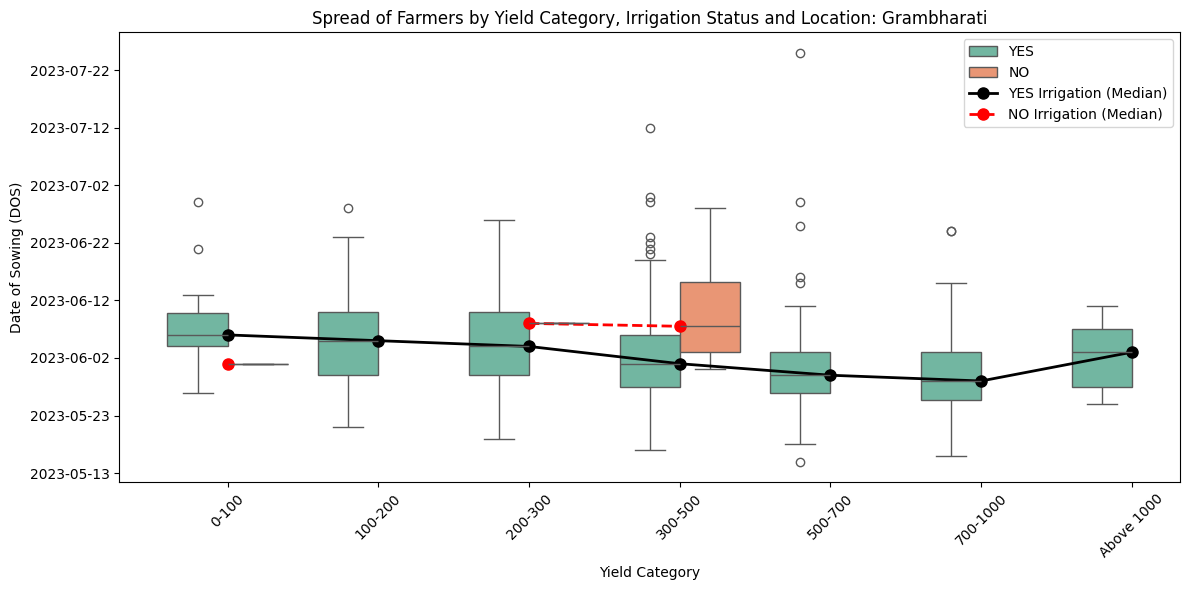

<ipython-input-18-2324b951299d>:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_yes = location_data[location_data['Irrigation Status'] == 'YES'].groupby('Yield Category')['DOS_numeric'].median()
<ipython-input-18-2324b951299d>:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_no = location_data[location_data['Irrigation Status'] == 'NO'].groupby('Yield Category')['DOS_numeric'].median()
<ipython-input-18-2324b951299d>:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([pd.to_datetime(

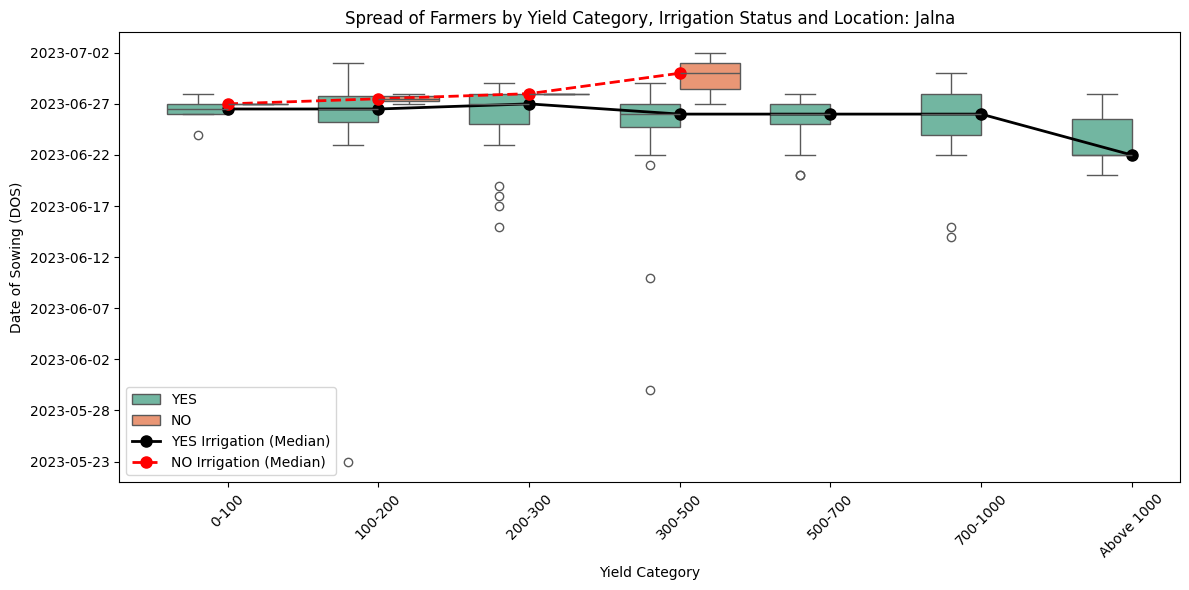

<ipython-input-18-2324b951299d>:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_yes = location_data[location_data['Irrigation Status'] == 'YES'].groupby('Yield Category')['DOS_numeric'].median()
<ipython-input-18-2324b951299d>:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_no = location_data[location_data['Irrigation Status'] == 'NO'].groupby('Yield Category')['DOS_numeric'].median()
<ipython-input-18-2324b951299d>:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([pd.to_datetime(

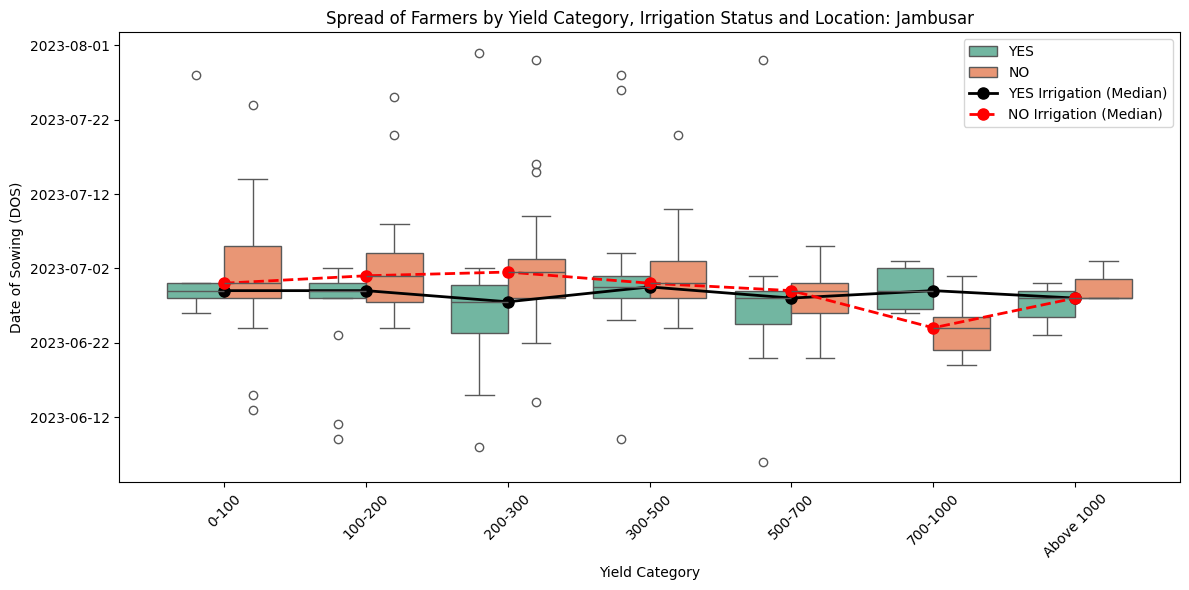

<ipython-input-18-2324b951299d>:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_yes = location_data[location_data['Irrigation Status'] == 'YES'].groupby('Yield Category')['DOS_numeric'].median()
<ipython-input-18-2324b951299d>:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_no = location_data[location_data['Irrigation Status'] == 'NO'].groupby('Yield Category')['DOS_numeric'].median()
<ipython-input-18-2324b951299d>:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([pd.to_datetime(

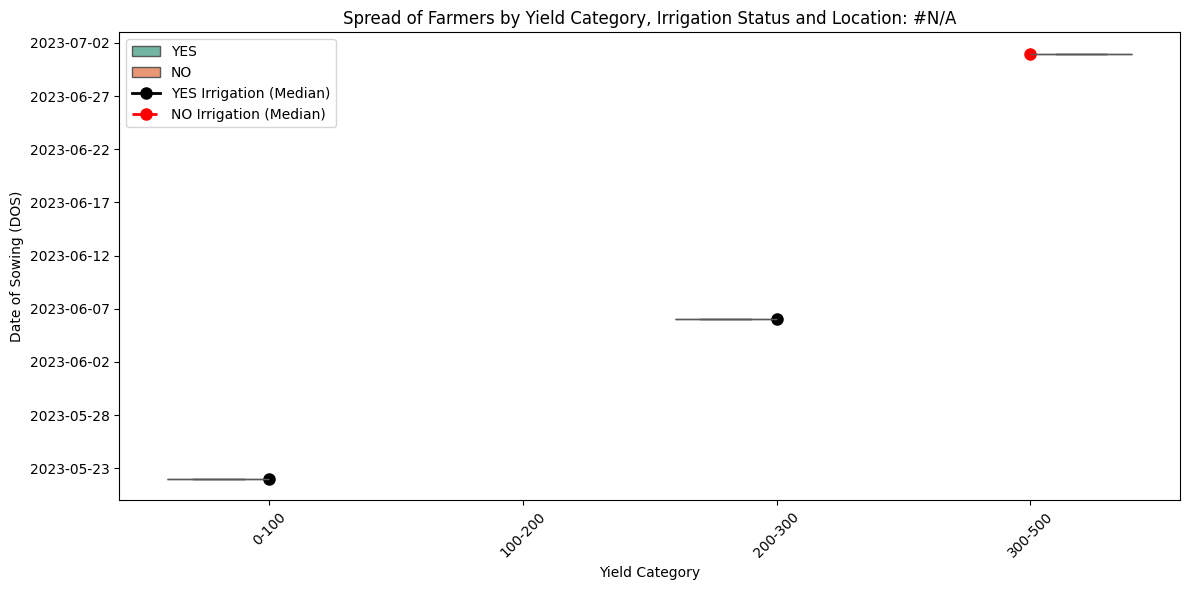

In [18]:
# Step 1: Install necessary libraries (if not already installed)
!pip install --upgrade gspread google-auth pandas matplotlib seaborn

# Step 2: Authenticate with Google using google-auth
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Authenticate the Google account
auth.authenticate_user()

# Use google-auth to get credentials and authorize gspread
creds, _ = default()
gc = gspread.authorize(creds)

# Step 3: Access Google Sheets using URLs
sheet_url = 'https://docs.google.com/spreadsheets/d/1hzlVvQIKfDp4J1CsZvSS1EOGqKZrihj4jm--w6QftT4/edit?gid=975935081'

# Open the Google Sheets using gspread
sheet = gc.open_by_url(sheet_url)

# Load the data from the sheet into a DataFrame
data = pd.DataFrame(sheet.sheet1.get_all_records())

# Step 4: Check and Clean the Column Names
data.columns = data.columns.str.strip()  # Strip extra spaces if any

# Step 5: Verify the 'DOS' column and ensure it's in datetime format
data['DOS'] = pd.to_datetime(data['DOS'], errors='coerce')

# Step 6: Yield Classification (We will assign categories)
def yield_category(yield_value):
    if yield_value <= 100:
        return '0-100'
    elif yield_value <= 200:
        return '100-200'
    elif yield_value <= 300:
        return '200-300'
    elif yield_value <= 500:
        return '300-500'
    elif yield_value <= 700:
        return '500-700'
    elif yield_value <= 1000:
        return '700-1000'
    else:
        return 'Above 1000'

# Step 7: Add the yield category column
data['Yield Category'] = data['Yield'].apply(yield_category)

# Step 8: Filter the data for YES and NO irrigation groups
yes_irrigation = data[data['Irrigation'] == 'YES']
no_irrigation = data[data['Irrigation'] == 'NO']

# Step 9: Combine both YES and NO irrigation groups back into one DataFrame for plotting
yes_irrigation['Irrigation Status'] = 'YES'
no_irrigation['Irrigation Status'] = 'NO'

# Combine them for the plot
combined_data = pd.concat([yes_irrigation, no_irrigation])

# Step 10: Convert DOS to numeric (for plotting), as boxplots require numeric values
combined_data['DOS_numeric'] = combined_data['DOS'].apply(lambda x: (x - pd.Timestamp('1970-01-01')).days)

# Step 11: Sort the Yield Categories in linear order
category_order = ['0-100', '100-200', '200-300', '300-500', '500-700', '700-1000', 'Above 1000']
combined_data['Yield Category'] = pd.Categorical(combined_data['Yield Category'], categories=category_order, ordered=True)

# Step 12: Create separate box plots for each location
locations = combined_data['Location'].unique()  # Get unique locations

for location in locations:
    # Filter the data for the current location
    location_data = combined_data[combined_data['Location'] == location]

    # Step 13: Create the Box Plot using Seaborn for each location
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Yield Category', y='DOS_numeric', hue='Irrigation Status', data=location_data, palette="Set2")

    # Step 14: Calculate the medians for each category (ignoring hue)
    medians_yes = location_data[location_data['Irrigation Status'] == 'YES'].groupby('Yield Category')['DOS_numeric'].median()
    medians_no = location_data[location_data['Irrigation Status'] == 'NO'].groupby('Yield Category')['DOS_numeric'].median()

    # Step 15: Draw a line connecting the medians for YES and NO
    plt.plot(medians_yes.index, medians_yes.values, marker='o', color='black', linestyle='-', linewidth=2, markersize=8, label='YES Irrigation (Median)')
    plt.plot(medians_no.index, medians_no.values, marker='o', color='red', linestyle='--', linewidth=2, markersize=8, label='NO Irrigation (Median)')

    # Step 16: Customize the plot
    plt.title(f'Spread of Farmers by Yield Category, Irrigation Status and Location: {location}')
    plt.xlabel('Yield Category')
    plt.ylabel('Date of Sowing (DOS)')

    # Convert the y-axis back to date format
    ticks = plt.gca().get_yticks()
    plt.gca().set_yticklabels([pd.to_datetime(tick, unit='D', origin='1970-01-01').strftime('%Y-%m-%d') for tick in ticks])

    plt.xticks(rotation=45)
    plt.tight_layout()

    # Add a legend to distinguish between the lines
    plt.legend()

    # Step 17: Show the plot for the current location
    plt.show()


# New Section

# New Section